# Week 5 : Lab 
 ## Interaction: File I/O and UI Controls
 ##### CS1P - University of Glasgow - John Williamson - 2016

In [8]:
## RUN ME FIRST
import ipywidgets as widgets
from IPython.display import display, HTML
from __future__ import division   # make division work like Python 3.x
# enable the plotting commands
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6


## Lab exercise

**You must make a reasonable attempt at this exercise to gain a tick for this work**.

<font color="red"> Remember to save your work frequently! </font>



## Purpose of this lab
This lab will familiarise you with:
* reading line-oriented text files
* handling events using callbacks
* writing text files


## Before the lab
* Complete at least the A exercises.
* You may want to read pages 115-120 of "Think like a computer scientist"

## During the lab session
* Complete the B exercises.



## A. Quick problems
These should take less than 10 minutes each

### A.1 Spellcheck
* There is a dictionary of (lowercase) words in the file "words.txt". 
* There is one word per line.
* Write a program that asks for a word from the user, and if the word is in the dictionary, prints "Spelled OK", otherwise prints "Misspelled"
* Note: to get the string to work correctly, you must **strip** the newline off of it:

        line = line.strip()
        
will return just the printable text of the line.


In [8]:
# Solution goes here
def check_spelling(word, possible_words):
    tmp = word + "\n"
    if tmp in possible_words:
        return "Spelled OK"
    else:
        return "Missplled"

with open("words.txt") as words:
    word = raw_input("Check spelling of word: ")
    print check_spelling(word, words)

Check spelling of word: doot
Missplled


### A.2 Colouring the notebook
The code below generates a slider and displays it. It attaches an **observation** callback that is called when the value of the slider changes

In [9]:
def print_slider(slider):
    # print the current value of a slider
    # note that we must use the following code to *only* get the update events
    # First, check if this is a value update callback
    if slider["name"]=="value":
        # if so, get the new value of the slider
        print "Slider now at:", slider["new"]
       
# create a slider than can go from -10 to 10, in increments of 1
slider = widgets.IntSlider(min=-10, max=10, step=1)

# attach the callback to the slider
# now, print_slider will be called when the slider is moved
slider.observe(print_slider)
display(slider)

Slider now at: 1
Slider now at: 2
Slider now at: 3
Slider now at: 4
Slider now at: 5
Slider now at: 6
Slider now at: 7
Slider now at: 8
Slider now at: 9
Slider now at: 10
Slider now at: 9
Slider now at: 8
Slider now at: 6
Slider now at: 4
Slider now at: 1
Slider now at: -10


## Task 
 The function `set_colour(r,g,b)` below can be used to change the colour of a the notebook background. It takes three values (red, green, blue) which have to range from 0 to 255. 
 
Create a set of three sliders, which range from 0 to 255. Display all three sliders and allow the notebook background colour to be adjusted interactively. *Note that you want to use three separate callbacks here.*

In [11]:
## do run this cell to define the function.
from nbcolour import set_colour

# test: set the background to black
set_colour(0,0,0)    

In [15]:
# Solution goes here
CURR_R,CURR_G,CURR_B = 0,0,0

def set_r(slider):
    if slider["name"] == "value":
        global CURR_R
        CURR_R = slider["new"]
        set_colour(CURR_R, CURR_G, CURR_B)

def set_g(slider):
    if slider["name"] == "value":
        global CURR_G
        CURR_G = slider["new"]
        set_colour(CURR_R, CURR_G, CURR_B)
        
def set_b(slider):
    if slider["name"] == "value":
        global CURR_B
        CURR_B = slider["new"]
        set_colour(CURR_R, CURR_G, CURR_B)
        
r_slider = widgets.IntSlider(min=0, max=255, step=1)
r_slider.observe(set_r)
g_slider = widgets.IntSlider(min=0, max=255, step=1)
g_slider.observe(set_g)
b_slider = widgets.IntSlider(min=0, max=255, step=1)
b_slider.observe(set_b)
display(r_slider)
display(g_slider)
display(b_slider)

### A.3 Buttons
Modify the code below so that three buttons appear. Make each prints a *distinct* message out. **But** don't define any new callback functions  -- just write a modified `message` function. *There should only be one callback for all three buttons.*

*Hint* What is the value of `s`? Also, remember what I did in the Week 5 video.

In [ ]:
# modify this code to have three buttons. 
def message(s):
    print "You pressed my button!"

# make a button
button = widgets.Button(description='Press!', width=2)

# tell the button what to do when I click it
button.on_click(message)

# display the buttons in a row(here, just one button)
# note that the argument to HBox() is a list of widgets to display
display(widgets.HBox([button]))

In [17]:
# Solution goes here
def message(s):
    print s.tooltip

button_1 = widgets.Button(description='Press!', width=2, tooltip="Doot")
button_1.on_click(message)
button_2 = widgets.Button(description='Press!', width=2, tooltip="Dooty")
button_2.on_click(message)
button_3 = widgets.Button(description='Press!', width=2, tooltip="Dooty McDootface")
button_3.on_click(message)

display(widgets.HBox([button_1, button_2, button_3]))

Doot
Dooty
Dooty McDootface


### A.4 Matching lines in a file
* Write a program which checks each line of text in a file to see if it begins with a given string.
* You can use `long_string.startswith("pattern")` to see if `pattern` occurs at the start of `long_string`.
* If the line contains the string, print it out.

Apply your program to the file `romeo_juliet.txt` looking for the pattern `"  Rom."` (note there are two spaces at the start!) and writing the line to "romeos_lines.txt". This will only copy the *first* of Romeo's lines in any passage.

Repeat this process to copy Juliet's (first) lines to "juliets_lines.txt".

*Note that we did a very similar example in the lecture notes!*

**Optional extension (slightly hard):**
Make the code copy *all* of Romeo's (or Juliet's) lines, not just the first line in any block of dialogue. You will need to look at romeo_juliet.txt to see how you could find this from the structure of the file.

In [ ]:
# Solution goes here
def get_lines_starting_with(start, all_lines):
    lines = []
    
    for line in all_lines:
        if line.startswith(start):
            lines.append(line)
    return lines

def get_lines(name, all_lines):
    lines = []
    is_same_person = False
    start = "  " + name + "."
    
    for line in all_lines:
        if line.startswith(start):
            is_same_person = True
        if not line.strip():
            is_same_person = False
        
        if is_same_person:
            lines.append(line[:-1])
    return lines

with open("romeo_juliet.txt") as f:
    for line in get_lines("Rom", f):
        print line

### A.5 Walking around

**[This may take slightly longer than the other A exercises]**

The **Dropdown** widget shows a list of options. Run the code below to see what it does.

In [ ]:
def dropdown_changed(dropdown):    
    # callback: check if the value changed, and if so, write it out
    if dropdown["name"]=="value":
        print "Dropdown is now ", dropdown["new"]

# three possible options: 1,2,3. Start off with 2.
dropdown = widgets.Dropdown(options=['1', '2', '3'],value='2', description='Number:',)

# set the callback. 
dropdown.observe(dropdown_changed)
display(dropdown)

There are two files called `passages.txt` and `rooms.txt`. Each is a list of types of rooms or passages, one word per line. Start by checking you can create a list of rooms and passages from these files. 

Then, create a simple interface with three dropdowns: one to select a first room, the second to select a passage, and third to select a second room. The options in the dropdown should be the lists loaded from these two files.

**Use three separate callbacks for the dropdown menus**

Finally, add a button that, when pressed, prints out a message like:

    "He went from the cellar to the kitchen via the fire pole"
    "She went from the cloak room to the throne room via the dumbwaiter"
    
substituting in the values chosen from the three dropdowns.     

In [54]:
# Solution goes here
TRIP = [None, None, None]
ORDER = ["Room 1", "Passage", "Room 2"]

def get_trip_index(desc):
    if desc not in ORDER:
        raise ValueError("The given desc is not found in order!")
    else:
        return ORDER.index(desc)

def update(dropdown):
    if dropdown["name"] == "value":
        index = get_trip_index(dropdown["owner"].description)
        TRIP[index] = dropdown["new"]
        
def init_dropdown(desc, options):
    dropdown = widgets.Dropdown(options=options, value=options[0], description=desc)
    dropdown.observe(update)
    display(dropdown)
    TRIP[get_trip_index(desc)] = options[0]
    
def print_trip(dropdown):
    print "They went from the %s to the %s via the %s" % tuple(TRIP)
        
with open("rooms.txt") as rooms, open("passages.txt") as passages:
    r = map(lambda line: line.strip(), rooms.readlines())
    init_dropdown("Room 1", r[:])
    init_dropdown("Passage", map(lambda line: line.strip(), passages.readlines()))
    init_dropdown("Room 2", r)
    
button= widgets.Button(description='Print')
button.on_click(print_trip)
display(button)

They went from the aerary to the avenue via the aerary
They went from the corner office to the exit via the bathroom


## B. Airline ticket sales
<img src="imgs/runway.jpg">
*[Image credit: Bernal Saborio via flickr.com CC-BY-SA 2.0]*

You have to implement an airline ticket search system for UK flights. 

You have been provided with a list of flight information in a file `prices.txt`, in the format (one entry per line)
    
       <start_airport>, <destination_airport>, <price>, 
       <duration>, <airline>
       
For example, a route from Helsinki to Berlin Tegel costing £250 and taking 104 minutes via *Germanwings* appears as:

    HEL,TXL,250,104,Germanwings
    
You also have a file `location.txt` which has a list of entries:

    <airport_code>, <country>, <latitude>, <longitude>
    
For example, the entry for Helsinki airport is:

    HEL,Finland,60.317222,24.963333
    
----    
This is not a toy example. The data for this exercise is real data, from [OpenFlights](http://www.openflights.org). The format used here is written in a slightly simplified form. The ticket price and flight duration are simulations. Latitude and longitude are the position of the airport on Earth. **Data for every flight in the world is provided.**

You can look at these text files by clicking on them from the notebook file browser.

### B.1 Reading cities
The data includes all scheduled flights for the *entire world*. We just want to use the data for the UK.
Read the `location.txt` data, and store a list of the airport information, only putting entries in the list where the *country* is the "United Kingdom". 

### Steps

To read a line of text and split it into a list of components, you can use code like:

    for line in file:
        components = line.strip().split(",")
        # do stuff with components -- it will be a list
        
which will convert each line of the file into a **list** of elements,
one element per comma separated value. For example:

    one,two,three
    
will become the list `["one","two","three"]`

In [2]:
# splits the string into a list of strings, splitting at each comma
print "HEL,Finland,60.317222,24.963333".strip().split(",")

['HEL', 'Finland', '60.317222', '24.963333']


Observe that you can use list indexing to select the relevant column of one row (one line) of data from the file. (e.g. `components[0]` would be the airport code)

Note: to make the next part easier, you might want to create two lists; one a list of *just* the airport codes, and one with the full information for each airport.

**Check your list of airports looks OK before continuing. There are 119 airports in the UK. The first UK Airport in the file is BFS and the last is QQW. **

------

Now read each line of `prices.txt`, and store each entry in a list, but only keep entries where *both* the start and destination airports are in your list of UK airports. 

Each sublist from prices list should have 5 entries, one for each of the 5 columns in prices.txt.

**There should be 307 scheduled routes in the UK.** Many airports will have no scheduled flights (charter/private only). This is correct.

In [9]:
# Solution goes here
def load_csv(file_name):
    csv = []
    with open(file_name) as f:
        for line in f:
            csv.append(line.strip().split(","))

    return csv

def load_locations(file_name="location.txt"):
    return load_csv(file_name)

def load_prices(file_name="prices.txt"):
    return load_csv(file_name)

def get_all_price_country(country, locations=load_locations(), prices=load_prices()):
    locs = []
    result = []
    
    for loc in locations:
        if loc[1] == country:
            locs.append(loc[0])
    
    for price in prices:
        if price[0] in locs and price[1] in locs:
            result.append(price)
    
    return result

print "Number of prices for UK flights:", len(get_all_price_country("United Kingdom"))

Number of prices for UK flights: 307


### B.2 Plotting cities and routes
You can plot points on a map of the UK using the code below. Create a function that will show all airports and all routes in the UK using the lists you have read.

#### Plotting
To do this, note that you can plot a red circle at a given `x,y` location using 

    plt.plot(x,y,'ro')
    
Because we are drawing on a map, `x` and `y` mean `longitude` and `latitude`.

You can plot a faint red line between two points `[x1,y1]` and `[x2,y2]` using:

    plt.plot([x1, y1], [y1, y2], 'r-', alpha=0.25)
       
*Note: the route between two points on a globe is not really a straight line (it is a great circle section) -- **but** for small distances like within the UK it is acceptable to draw a straight line instead of the true curve.*

### Strings
Note that you have read in a **string** from the file. This means all of the entries in your list of airports are strings. You will have a list of airports that has elements that look like this (print it out to check!):
    
    ['BFS', 'United Kingdom', '54.6575', '-6.215833']
    
Notice that the last two numbers are actually strings, not floats -- you can tell because of the quotes. You will need to convert them to floats when you use them to plot the airport location. (hint: remember `float()`)

If you do this correctly, the result will look like this:
<img src="imgs/result_airports.png">

**If you get the airport locations in completely the wrong place (i.e. somewhere nowhere near the drawing of the UK), you have latitude and longitude reversed; `plot` expects the arguments in the *opposite* order to the way they are stored in the airport location file.**

To complete the next part (B.3), you will need to be able to specify certain routes to be drawn or not drawn. Think about how to make the drawing of routes into a function, and how to *parameterise* it to allow different routes to be selected according to some criteria.
    

In [ ]:
# copy this into your solution
import coast
# create a new figure to draw on
plt.figure()

## You can change draw_map to take parameters...
def draw_map():    
    # draw the coast outline
    coast.draw()
    
    ## YOUR DRAWING CODE HERE
    
    # force the map to be redrawn
    plt.gcf().canvas.draw()
draw_map()    


<IPython.core.display.Javascript object>


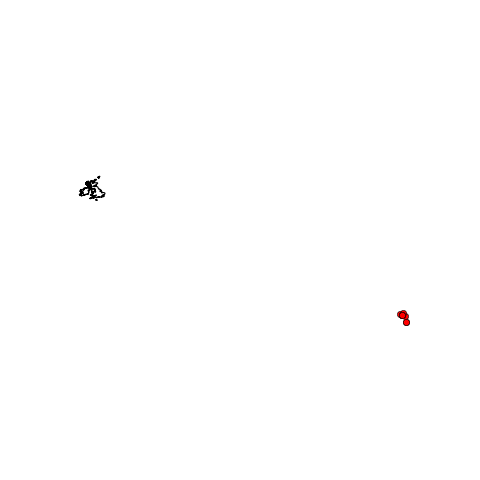

In [10]:
# Solution goes here

# copy this into your solution
import coast
# create a new figure to draw on
plt.figure()

## You can change draw_map to take parameters...
def draw_map(routes):    
    # draw the coast outline
    coast.draw()
    
    ## YOUR DRAWING CODE HERE
    
    for route in routes:
        start = route[0]
        end = route[1]
        plt.plot(start[0], start[1], 'ro')
        plt.plot(end[0], end[1], 'ro')
        plt.plot([start[0],end[0]], [start[1],end[1]], 'r-', alpha=0.25)
    
    # force the map to be redrawn
    plt.gcf().canvas.draw()

def price_to_route(price, locations):
    start = price[0]
    end = price[1]
    
    for loc in locations:
        if loc[0] == start:
            start = (float(loc[3]), float(loc[2]))
        elif loc[0] == end:
            end = (float(loc[3]), float(loc[2]))
    
    return (start, end)
    
routes = []
locations = load_locations()
all_prices = get_all_price_country("United Kingdom", locations=locations)

for price in all_prices:
    routes.append(price_to_route(price, locations))

draw_map(routes)

### B.3 Filtering and selecting routes
*Note that you have already done all of the techniques necessary to complete this part in the A section!. **Also, it is easiest to put this code all in the solution box for B.2***


1. Create a drop-down box where you can select a starting airport.

2. Add an option for "any" to the start of the dropdown to represent any airport.

3. Create a slider that sets a maximum price of a route, from 0 to £400. Use the step parameter to make the price adjustable in £50 increments.

4. Make the callbacks for the drop-down box and the slider update the route map to show only routes going from the selected start position which are less than the maximum price, allowing for "any" to go from any possible airport (as long as it is cheap enough). You may need to alter your solution to B.2 to do this.

Be aware that updating the map might take a second or two -- be patient when scrubbing the slider back and forth.

**Think about how you are going to draw all the routes that satisfy both criteria! How will the drawing code know which routes to draw? Your callbacks should be calling draw_map() to update the map after *each* change.** 

In [13]:
# Solution goes here
ALL_LOCATIONS = load_locations()
ALL_PRICES = load_prices()
SELECTED_LOC = "Any"
SELECTED_MAX_PRICE = 0

def update_map(prices):
    routes = []
    for price in prices:
        routes.append(price_to_route(price, ALL_LOCATIONS))
    
    draw_map(routes)

def get_flitered_prices():
    prices = []
    if SELECTED_LOC == "Any":
        prices = ALL_PRICES
    else:
        prices = filter(lambda price: price[0] == SELECTED_LOC, ALL_PRICES)
    
    prices = filter(lambda price: int(price[2]) <= SELECTED_MAX_PRICE, prices)
    return prices
    
def dropdown_changed(dropdown):
    if dropdown["name"] == "value":
        global SELECTED_LOC
        SELECTED_LOC = dropdown["new"]
        #update_map(get_flitered_prices())
        
def slider_changed(slider):
    if slider["name"] == "value":
        global SELECTED_MAX_PRICE
        SELECTED_MAX_PRICE = slider["new"]
        #update_map(get_flitered_prices())
        
def button_clicked(button):
    update_map(get_flitered_prices())
    
def print_prices(button):
    with open("%s_%d_ticket.txt" % (SELECTED_LOC, SELECTED_MAX_PRICE), "w") as f:
        prices  = get_flitered_prices()
        for price in prices:
            f.write("Flight: %s to %s\nCarrier: %s\nDuration: %s\nTotal Cost: £%s\n\n" % (price[0], price[1], price[4], price[3], price[2]))

#SELECTED_LOC's default value is the value which will be added to the beginning of the list and be the default value
codes = map(lambda loc: loc[0], ALL_LOCATIONS)
codes.insert(0, SELECTED_LOC)
dropdown = widgets.Dropdown(options=codes, value=SELECTED_LOC, description='Starting Airport:',)
slider = widgets.IntSlider(min=0, max=400, step=50)
button = widgets.Button(description='Press!')
print_but = widgets.Button(description='Print')

dropdown.observe(dropdown_changed)
slider.observe(slider_changed)
button.on_click(button_clicked)
print_but.on_click(print_prices)
display(dropdown)
display(slider)
display(button)
display(print_but)

### B.4 Writing out the routes
<img src="imgs/ticket_stub.jpg">
*[Image credit:  hirotomo t via flickr.com CC-BY-SA 2.0]*

1. Add a button called "Print Ticket" to your B.3 solution.
2. When it is pressed, write a set of routes out to a file called `<airport>_<price>_ticket.txt` where `<airport>`  should be the code for the airport we are starting from, and `<price>` is the max price set by the slider. It should contain all of the routes from that airport that are less than the set price (i.e. all that are shown on the map).
For example, if the slider is set to £200 and the airport is set to GLA, you should write to `GLA_200_ticket.txt`
3. Write the matching routes out to the file. Each route should look like:
    
        Flight: <airport_1> to <airport_2>
        Carrier: <airline>        
        Duration: <duration> minutes        
        Total Cost: £<price>
        
There should be one of these route entries per possible route from the airport. There should be a newline between each route.

Check that your written out route information looks correct by finding the file in Windows Explorer and opening it.

Remember to open the file in the correct mode to be able to write to it!



## C. Extended problems
These *extended* problems are optional for students who are keen to learn more. If you've finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. 

<font color="red"> You do not need to attempt any of this section to receive a tick! </font>

## C.1 Cheapest route
**WARNING: This section is more challenging than previous C exercises. Attempt at your own risk!**

Write a program that takes two airports as input from the user and prints out the *cheapest route*  to get between them. This could include any number of intermediate airports.  The output should include each intermediate airport and the price of each leg of the journey.

For example there is no route at all between LSI and LAX, but you can go LSI->GLA->LHR->LAX. There may be cheaper routes that get you there for less money.

### Steps

1. Get this working for the UK airports first. Test it for a few airport pairs and verify you are finding valid routes.
1. Then, extend it to the whole world.

### How?
This is a **shortest path** question. 

We can consider the problem as a **graph**, in the sense of a set of vertices connected together by edges. This is a very powerful way of representing many problems.

<img src="imgs/dijkstra_animation.gif">

In formal notation, if we consider a graph $G=\{V,E\}$ to consist of vertices $V=\{v_1, v_2, \dots\}$ and edges $E=\{e_1, e_2, \dots\}$, where each edge $e_i$ has an associated **weight** $w_i$, we want to be able to find a route between a vertex $v_j$ and another vertex $v_k$ that minimises the sum of the edge weights we need to traverse to get there. The total weight of a path through the graph from $v_j$ to $v_k$ is given by by the sum of the edge weights in between $\sum_i w_i$.

#### Airports as graphs
In our example, the *vertices* of the graph are the *airports*; the *edges* are the *routes*; and the *weights* are the *prices* of the flights between each airport. A path from one airport to another is a path on the graph, and its total cost is the sum of the prices of each leg of the route.

### Dijkstra
[Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) lets us *efficiently* compute shortest paths in any general graph. To solve this problem, you will need to implement Dijkstra's algorithm. 

Look this up on the Web; the Wikipedia page is a good introduction, but there are many other tutorials you can follow. Start with the simplest version of Dijkstra's algorithm and work from there; the first algorithm given in the "Pseudocode" section of the Wikipedia page is relatively easy to implement.

### Computation time
Note: this search will take a second or two to run on the full world data. It should be pretty instantaneous for the UK only data.

### Output
Your output for a route like LTN->LGW should look like this:

    Cheapest route  LTN->EDI->LGW
    Total cost: £423

    Detailed breakdown:
    LTN->EDI £283
    EDI->LGW £140


In [ ]:
# Solution goes here

In [ ]:
get_route(uk_airport_information, uk_routes, 'LTN', 'LGW')    

In [ ]:
# Solution goes here

In [ ]:
get_route(world_airports, world_routes, 'JOS', 'LSI')    

## C.2 Multi-stop
Allow the search to find routes that include any number of specified stops. For example, I could go find a route that goes from EDI->GLA via JFK, including any number of intermdiate airports. This is sometimes called an "open jaw" ticket (don't ask me why!).

In [ ]:
# Solution goes here